![image](Logo_P5.PNG)

<h1 style = "text-align:center; color:red;border: solid red 3px;padding-top:15px;padding-bottom:15px;"> Projet 5 : Optimisez la gestion des données d'une boutique avec R  </h1>

<h3 style="color:blue;"> Sommaire </h3>

### [Introduction](#sec:Int)

[*Les librairies utiles pour le projet*](#sec:lib)

[*Importation des données (xlsx)*](#sec:xls)

## [Premièrement, un rapprochement entre les deux exports](#sec:1)

[1. Détecter et traiter les erreurs](#sec:err)

[*Erreurs de type*](#sec:typ)

[*Valeurs manquantes*](#sec:N)

[*Doublons*](#sec:Dou)

[*Variables vides (=0)*](#sec:san)

[2. Fusionner les données](#sec:Fus0)

[*1er : Fusionner (liaison & erp)*](#sec:Fus1)

[*2eme : Fusionner (liaison_erp & web)*](#sec:Fus2)

[*Détecter et traiter les erreurs après 2eme fussionner*](#sec:Fus3)


## [Deuxièmement, Calculer le chiffre d’affaires](#sec:2)

[1. Calculer le chiffre d'affaire par produit](#sec:21)

[2. Calculer le chiffre d'affaire total](#sec:22)


## [Troisièmement, Extraire les outliers dans les prix](#sec:3)

[1. La méthode des visuelles](#sec:visuelles)

[2. La méthode du quantile](#sec:quantile)

[3. La méthode de la moyenne et écart type](#sec:moyenne)

[4. La méthode de la médiane et écart absolu médian](#sec:médiane)

[5. La méthode des interquartiles](#sec:interquartiles)

[6. La méthode du z score](#sec:Z)

## [Conclusion et perspectives](#sec:Con)

 ---

<a id="sec:Int"></a>

<h3 style="color:red;"> Inrtoduction </h3>

Je suis data analyst freelance chez BottleNeck, un marchand de vin très prestigieux.

Ma première mission se passe en 3 points :

- ***Premièrement***, un rapprochement entre les deux exports : un export de l’ERP contenant les références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS issu de la boutique en ligne contenant les informations des produits commercialisés en ligne *nom, description, nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps....*.

- ***Deuxièmement***, Calculer le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

- ***Troisièmement*** et pour finir,  verifier s’il n’y a pas eu des erreurs de saisie dans certains prix des produits et effectuer une analyse sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

Ce rapport va présenter mes résultats lors de la prochaine réunion de COPIL. Cela permettrait de montrer les progrès de  BottleNeck. 

In [1]:
rm(list=ls()) # On efface le cache (Pour ne pas saturer la mémoire vive Ram)

<a id="sec:lib"></a>

---
#### *Les librairies utiles pour le projet*
---

**readxl** Importer des fichiers excel.

**data.table** Traitement des données sous la forme de tableaux.

**dplyr** Traitement des données sous la forme de tableaux.

**stringr** Traitement des chaines de caractères.

**ggplot2** Visualisation de données.

**tidyverse** Elles abordent un très grand nombre d’opérations courantes dans R :
visualisation,
manipulation des tableaux de données,
import/export de données,
manipulation de variables,
extraction de données du Web,
programmation...

In [2]:
library("readxl")
library(data.table)
library(dplyr)
library(stringr)
library("ggplot2")
library(tidyverse)

Warning message:
“package ‘data.table’ was built under R version 4.1.1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   2.1.1     

Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘tidyr’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖

<a id="sec:xls"></a>

#### *Importation des données (xlsx)*

---

Il y a 3 fichiers Excel à disposition :

- Un fichier **web.xlsx** d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne *nom, description, nombre de ventes...*, qui contient le nombre de ventes pour chaque produit depuis sa mise en ligne, il ne permet pas d’analyser l'évolution des ventes dans le temps.

In [3]:
web <- read_excel("Ressourses/web.xlsx")
dim(web) #1513/28
head(web,50)

[1] 1513   28

sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,⋯,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dttm>,⋯,<chr>,<dttm>,<dttm>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
bon-cadeau-25-euros,0,0,0,0,10,taxable,NA,1,2018-06-01 13:53:46,⋯,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0,product,NA,0
15298,0,0,0,0,6,taxable,NA,2,2018-02-08 12:58:52,⋯,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0,product,NA,0
15296,0,0,0,0,0,taxable,NA,2,2018-02-08 13:49:41,⋯,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0,product,NA,0
15300,0,0,0,0,0,taxable,NA,2,2018-02-08 14:08:36,⋯,pierre-jean-villa-croze-hermitage-accroche-coeur-2018,2020-06-26 18:15:03,2020-06-26 16:15:03,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3850,0,product,NA,0
19814,0,0,0,0,3,taxable,NA,2,2018-02-09 14:01:05,⋯,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4032,0,product,NA,0
19815,0,0,0,0,0,taxable,NA,2,2018-02-12 09:04:37,⋯,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4039,0,product,NA,0
15303,0,0,0,0,0,taxable,NA,2,2018-02-12 09:13:35,⋯,pierre-jean-villa-saint-joseph-saut-ange-2018,2019-11-02 13:25:07,2019-11-02 12:25:07,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4040,0,product,NA,0
14975,0,0,0,0,0,taxable,NA,2,2018-02-12 09:45:14,⋯,pierre-gaillard-condrieu-2018,2020-08-14 18:15:02,2020-08-14 16:15:02,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4041,0,product,NA,0
16042,0,0,0,0,7,taxable,NA,2,2018-02-12 09:54:27,⋯,pierre-gaillard-cornas-2017,2020-08-14 10:15:02,2020-08-14 08:15:02,NA,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4042,0,product,NA,0


- Un fichier **erp.xlsx** de l’ERP *pour gérer les ressources, les clients, etc,* contenant les références produit, leur prix de vente et leur état de stock.

In [4]:
erp <- read_excel("Ressourses/erp.xlsx")
dim(erp) #825/5
head(erp,3)

[1] 825   5

product_id,onsale_web,price,stock_quantity,stock_status
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3847,1,24.2,0,outofstock
3849,1,34.3,0,outofstock
3850,1,20.8,0,outofstock


- Un fichier **liaison.xlsx** qui permet d’établir le lien entre la référence du produit dans l’ERP ***product_id*** et la référence du même produit dans la base de la boutique en ligne ***SKU***.

In [5]:
liaison <- read_excel("Ressourses/liaison.xlsx")
dim(liaison) #825/5
head(liaison,3)

[1] 825   2

product_id,id_web
<dbl>,<chr>
3847,15298
3849,15296
3850,15300


<a id="sec:1"></a>

---
## Premièrement, un rapprochement entre les deux exports
---

<a id="sec:err"></a>

### 1. Détecter et traiter les erreurs
---

<a id="sec:typ"></a>

#### **Erreurs de type**
---
Le premier reflexe devrait être de vérifier que les variables ont bien été importées dans le bon type :

- ##### WEB

In [6]:
str(web)

tibble [1,513 × 28] (S3: tbl_df/tbl/data.frame)
 $ sku                  : chr [1:1513] "bon-cadeau-25-euros" "15298" "15296" "15300" ...
 $ virtual              : num [1:1513] 0 0 0 0 0 0 0 0 0 0 ...
 $ downloadable         : num [1:1513] 0 0 0 0 0 0 0 0 0 0 ...
 $ rating_count         : num [1:1513] 0 0 0 0 0 0 0 0 0 0 ...
 $ average_rating       : num [1:1513] 0 0 0 0 0 0 0 0 0 0 ...
 $ total_sales          : num [1:1513] 10 6 0 0 3 0 0 0 7 3 ...
 $ tax_status           : chr [1:1513] "taxable" "taxable" "taxable" "taxable" ...
 $ tax_class            : logi [1:1513] NA NA NA NA NA NA ...
 $ post_author          : num [1:1513] 1 2 2 2 2 2 2 2 2 2 ...
 $ post_date            : POSIXct[1:1513], format: "2018-06-01 13:53:46" "2018-02-08 12:58:52" ...
 $ post_date_gmt        : POSIXct[1:1513], format: "2018-06-01 11:53:46" "2018-02-08 11:58:52" ...
 $ post_content         : logi [1:1513] NA NA NA NA NA NA ...
 $ post_title           : chr [1:1513] "Bon cadeau de 25€" "Pierre Jean Villa S

- ##### ERP

In [7]:
str(erp)

tibble [825 × 5] (S3: tbl_df/tbl/data.frame)
 $ product_id    : num [1:825] 3847 3849 3850 4032 4039 ...
 $ onsale_web    : num [1:825] 1 1 1 1 1 1 1 1 1 1 ...
 $ price         : num [1:825] 24.2 34.3 20.8 14.1 46 34.3 32.7 31.2 60 42.6 ...
 $ stock_quantity: num [1:825] 0 0 0 0 0 0 15 34 12 66 ...
 $ stock_status  : chr [1:825] "outofstock" "outofstock" "outofstock" "outofstock" ...


- ##### LIAISON

In [8]:
str(liaison)

tibble [825 × 2] (S3: tbl_df/tbl/data.frame)
 $ product_id: num [1:825] 3847 3849 3850 4032 4039 ...
 $ id_web    : chr [1:825] "15298" "15296" "15300" "19814" ...


Tout semble en ordre

<a id="sec:N"></a>

---
#### **Valeurs manquantes**
---

##### ***Détecter des valeurs manquantes***

On va vérifier si notre jeu de données contient des valeurs manquantes par faire fonction : *valeurs_manquantes*

- ##### WEB

Afficher uniquement les variables qui ont des valeurs manquantes :

In [9]:
valeurs_manquantes_real <- function(arg_float, arg_string) { 
    nb_na = sapply(arg_float, function(y) sum(is.na(y)))#Valeurs manquantes
    nb_na = nb_na[nb_na>0]
    View(nb_na)
    sprintf("Le nombre total de valeurs manques dans %s est : %d.", arg_string, sum(nb_na))
}     

In [10]:
valeurs_manquantes_real(web,"web")

sku        average_rating           total_sales 
                   85                    83                    83 
           tax_status             tax_class           post_author 
                  797                  1513                    83 
            post_date         post_date_gmt          post_content 
                   83                    83                  1513 
           post_title          post_excerpt           post_status 
                   83                   797                    83 
       comment_status           ping_status         post_password 
                   83                    83                  1513 
            post_name         post_modified     post_modified_gmt 
                   83                    83                    83 
post_content_filtered           post_parent                  guid 
                 1513                    83                    83 
           menu_order             post_type        post_mime_type 
                   83                    83                   799 
        comment_count 
                   83

[1] "Le nombre total de valeurs manques dans web est : 9941."

On observe que notre jeu de données ***web*** contient ***9941*** valeurs manquantes de ***42364*** valeurs totals. Regardons les plus en détails par visualisions :

***Visualisation de toutes les valeurs manquantes dans web***

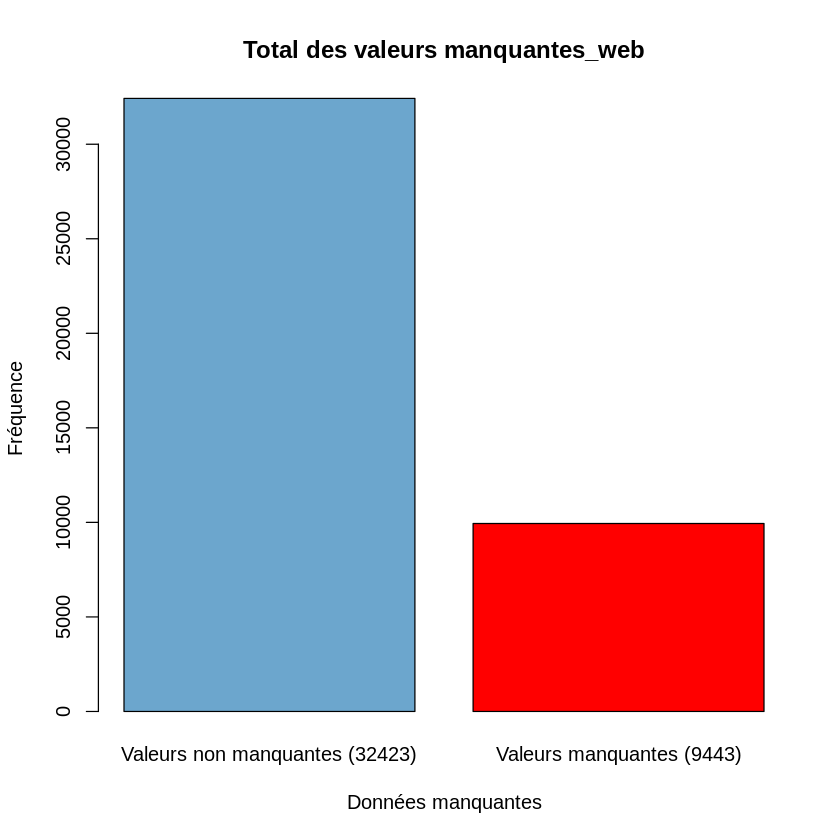

In [11]:
freq_web <- data.frame(table(is.na(web)))
  
# barplot pour la visualisation
barplot(freq_web$Freq , main = "Total des valeurs manquantes_web",
xlab = "Données manquantes", ylab = "Fréquence", 
        names.arg = c("Valeurs non manquantes (32423)","Valeurs manquantes (9443)"),
col = c("skyblue3","red"))

***Visualisation des valeurs manquantes dans chaque variable de web***

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,⋯,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
Valeurs manquantes,85,0,0,0,83,83,797,1513,83,83,⋯,83,83,83,1513,83,83,83,83,799,83
Valeurs non manquantes,1428,1513,1513,1513,1430,1430,716,0,1430,1430,⋯,1430,1430,1430,0,1430,1430,1430,1430,714,1430


[1] 42364

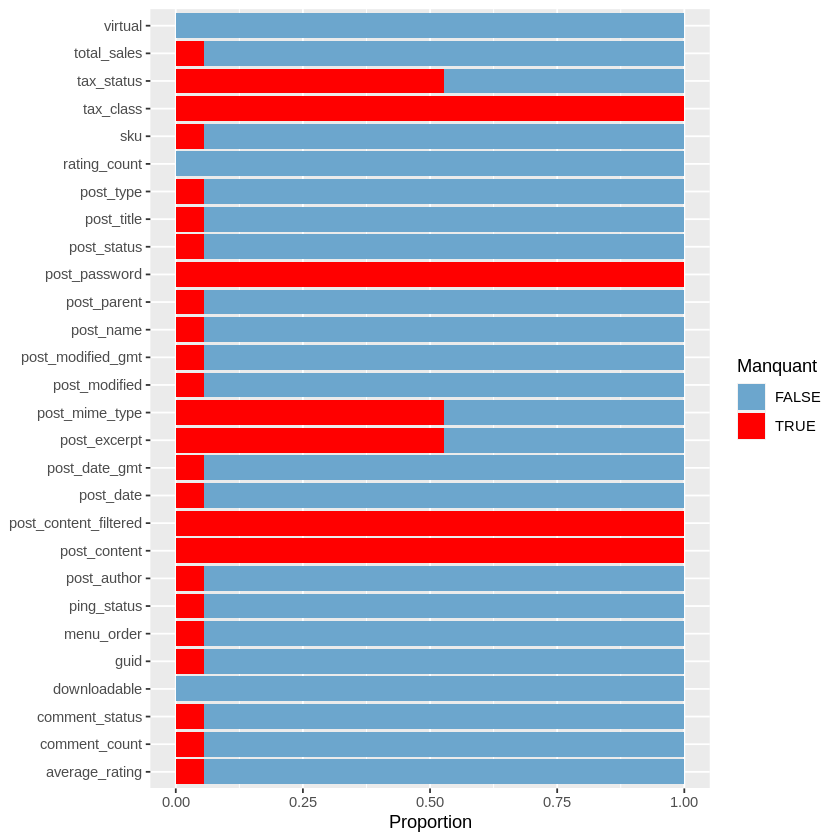

In [12]:
# function convert dataframe to binary TRUE/FALSE matrix
toBinaryMatrix <- function(web){
m<-c()
for(i in colnames(web)){
    x<-sum(is.na(web[,i]))
    # missing value count
    m<-append(m,x)
    # non-missing value count
    m<-append(m,nrow(web)-x) 
}
  
# adding column and row names to matrix
a<-matrix(m,nrow=2)
rownames(a)<-c("Valeurs manquantes","Valeurs non manquantes")
colnames(a)<-colnames(web)
  
return(a)
}

# function call
binMat = toBinaryMatrix(web)
binMat
sum(binMat)

web  %>%
  summarise_all(list(~is.na(.)))%>%
  pivot_longer(everything(),
               names_to = "Variables", values_to="Manquant") %>%
  count(Variables, Manquant) %>%
  ggplot(aes(y=Variables,x=n,fill=Manquant))+
  geom_col(position = "fill")+ 
  labs(x="Proportion")+
  scale_fill_manual(values=c("skyblue3","red"))+
  theme(axis.title.y=element_blank())

- ##### ERP

In [13]:
valeurs_manquantes_real(erp,"erp")

named integer(0)

[1] "Le nombre total de valeurs manques dans erp est : 0."

On observe que notre jeu de données ***ERP*** est propre et sans NA.

- ##### LIAISON

In [14]:
valeurs_manquantes_real(liaison,"liaison")

id_web 
    91

[1] "Le nombre total de valeurs manques dans liaison est : 91."

On observe que notre jeu de données ***Liaison*** contient ***91*** valeurs manquantes de ***1650*** valeurs totals. Regardons les plus en détails par visualisions :

***Visualisation des valeurs manquantes dans chaque variable de lision***

,product_id,id_web
Valeurs manquantes,0,91
Valeurs non manquantes,825,734


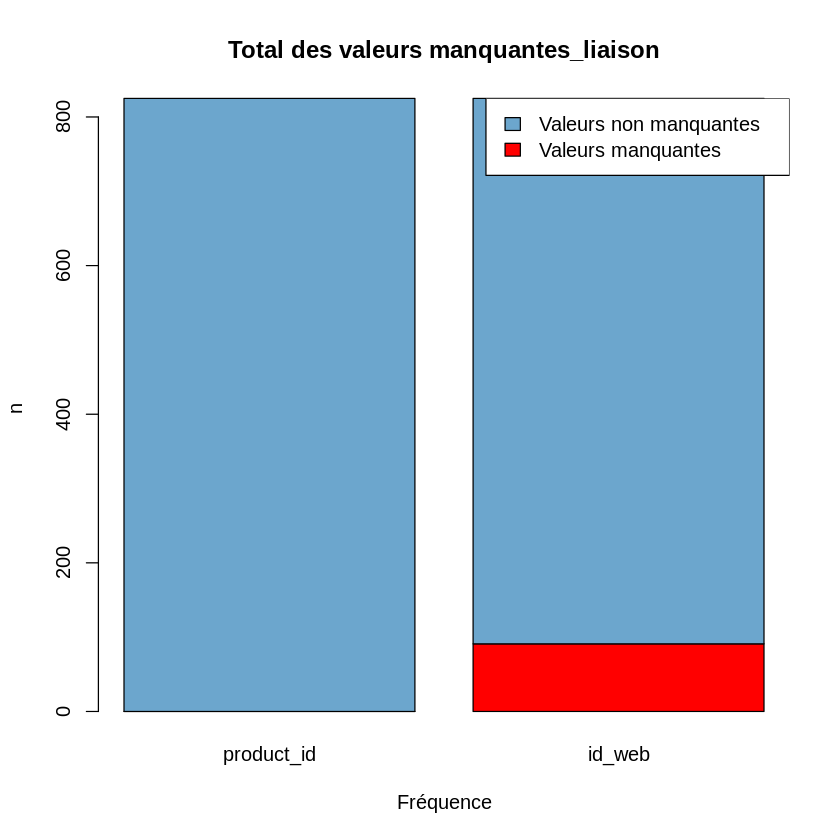

In [15]:
# function convert dataframe to binary TRUE/FALSE matrix
toBinaryMatrix <- function(liaison){
m<-c()
for(i in colnames(liaison)){
    x<-sum(is.na(liaison[,i]))
    # missing value count
    m<-append(m,x)
    # non-missing value count
    m<-append(m,nrow(liaison)-x) 
}
  
# adding column and row names to matrix
a<-matrix(m,nrow=2)
rownames(a)<-c("Valeurs manquantes","Valeurs non manquantes")
colnames(a)<-colnames(liaison)
  
return(a)
}

# function call
binMat = toBinaryMatrix(liaison)
binMat

# stacked barplot for missing data in all columns
barplot(binMat,
        main = "Total des valeurs manquantes_liaison",xlab = "Fréquence", ylab = "n",
col = c("red","skyblue3"))
  
# legend for barplot
legend("topright",
c("Valeurs non manquantes","Valeurs manquantes"),
fill = c("skyblue3","red"))

<a id="sec:sans_NA"></a>

---
##### ***Supprimer des valeurs manquantes***
---

À fin de réaliser la 1er et 2 eme demande, on va nettoyer nos bases de données, on va alors à commencer par supprimer les 4 variables qui sont contenants des valeurs complètement NA et ensuite supprimer de NA dans la variable sku de web :

- ##### WEB

In [16]:
web_sans_NA <- web %>% select(-"tax_class",-"post_password",-"post_content_filtered",-"post_content")

dim(web_sans_NA)

[1] 1513   24

In [17]:
web_sans_NA <- web_sans_NA[!is.na(web$sku),]
dim(web)
dim(web_sans_NA)

[1] 1513   28

[1] 1428   24

In [18]:
web_NA <- web[is.na(web$sku),]
dim(web)
dim(web_NA)
web_NA

[1] 1513   28

[1] 85 28

sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,⋯,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>,<dttm>,⋯,<chr>,<dttm>,<dttm>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,0,0,0,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


- ##### LIAISON

Ensuit on va supprimer de NA dans la variable id_web de Liaison :

In [19]:
liaison_sans_NA <- liaison[!is.na(liaison$id_web),]
dim(liaison)
dim(liaison_sans_NA)

[1] 825   2

[1] 734   2

In [20]:
liaison_NA <- liaison[is.na(liaison$id_web),]
dim(liaison)
dim(liaison_NA)
liaison_NA

[1] 825   2

[1] 91  2

product_id,id_web
<dbl>,<chr>
4055,NA
4090,NA
4092,NA
4195,NA
4209,NA
4233,NA
4278,NA
4279,NA
4565,NA


<a id="sec:Dou"></a>

---
#### **Doublons**
---

##### ***Détecter des valeurs douplons***  

Regardons à présent si certaines transactions sont apparues en doublons. Pour cela, on se concentrera sur des informations qui ne peuvent normalement pas être doublés, soit : sku, id_web et product_id. Sur ces 3 variables, il n'est normalement pas possible d'avoir deux transactions identiques :

- ##### WEB

In [21]:
print(paste("Le nombre total de valeurs doublons dans la variable sku de web_sans_NA est :", 
            sum(duplicated(web_sans_NA$sku)),".")) #Valeurs Doublons
print(paste("Le nombre total de valeurs non doublons dans la variable sku de web_sans_NA est :", 
            sum(!duplicated(web_sans_NA$sku)),".")) #Valeurs non Doublons

[1] "Le nombre total de valeurs doublons dans la variable sku de web_sans_NA est : 714 ."
[1] "Le nombre total de valeurs non doublons dans la variable sku de web_sans_NA est : 714 ."


On note que le variable **sku** de **web_sans_NA** contient **714** valeurs doublons de **1428** valeurs totals. Regardons les plus en détails par visualisions cette variable:

***Visualisation des données douplons pour la variable sku de web_sans_NA***

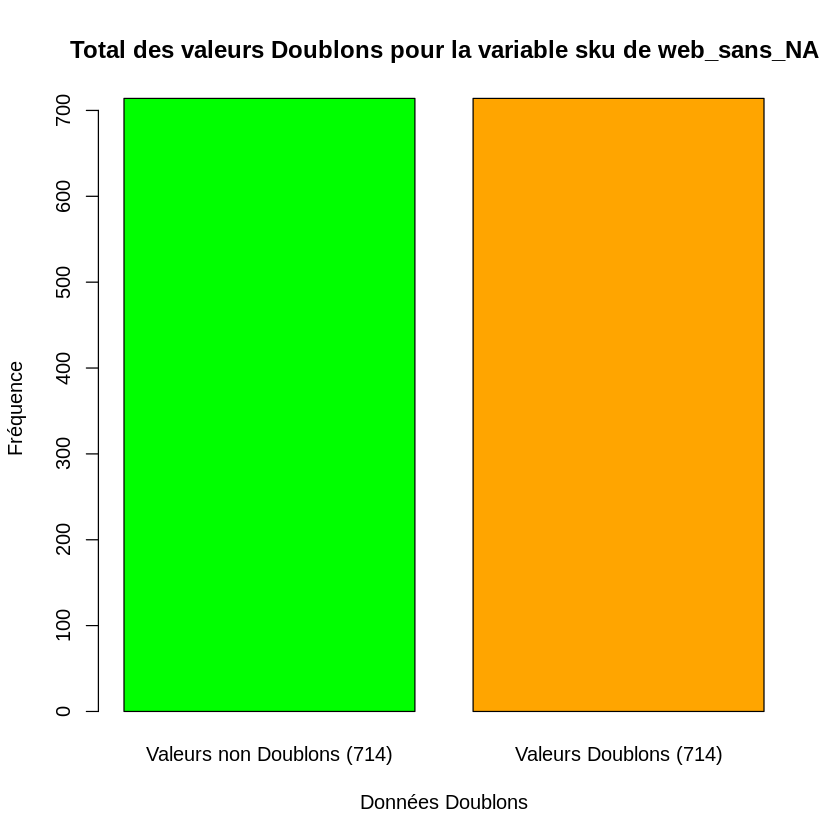

In [22]:
# frequency table for missing data for 1 column,
# here age column is taken
freq_web_sku2 <- data.frame(table(duplicated(web_sans_NA$sku)))
  
# barplot for 1 column/feature
barplot(freq_web_sku2$Freq,
main = "Total des valeurs Doublons pour la variable sku de web_sans_NA",xlab = "Données Doublons",
ylab = "Fréquence",names.arg = c("Valeurs non Doublons (714)","Valeurs Doublons (714)"),
col = c("green","orange"))

- ##### erp

In [23]:
print(paste("Le nombre total de valeurs doublons dans la variable product_id de ERP est :", 
            sum(duplicated(erp$product_id)), "."))

[1] "Le nombre total de valeurs doublons dans la variable product_id de ERP est : 0 ."


Ici on trouve  que la variable ***product_id*** de ***ERP*** est propre sans des valeurs doublons.

- ##### Liaison_sans_NA

In [24]:
print(paste("Le nombre total de valeurs doublons dans la variable product_id de liaison_sans_NA est :", 
            sum(duplicated(liaison_sans_NA$product_id)), "."))
print(paste("Le nombre total de valeurs doublons dans la variable id_web de liaison_sans_NA est :", 
            sum(duplicated(liaison_sans_NA$id_web)), "."))

[1] "Le nombre total de valeurs doublons dans la variable product_id de liaison_sans_NA est : 0 ."
[1] "Le nombre total de valeurs doublons dans la variable id_web de liaison_sans_NA est : 0 ."


Alors on trouve que les variable **id_web** et **product_id** de **Liaison** sont propre sans des valeurs doublons.

<a id="sec:sans2"></a>

---
#### *Supprimer des valeurs douplons (deuxième)*
---

On a trouvé déjà qu'il y a des **714** des valeurs qui sont en **double** dans la variable **sku** de **web_sans_NA**. Il suffit donc de supprimer l'une des deux via le sku.

In [25]:
web_propre <- web_sans_NA[!duplicated( web_sans_NA$sku),]
dim(web_propre)
head(web_propre,3)

[1] 714  24

sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,⋯,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dttm>,⋯,<chr>,<chr>,<dttm>,<dttm>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
bon-cadeau-25-euros,0,0,0,0,10,taxable,1,2018-06-01 13:53:46,2018-06-01 11:53:46,⋯,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,0,https://www.bottle-neck.fr/?post_type=product&#038;p=4954,0,product,NA,0
15298,0,0,0,0,6,taxable,2,2018-02-08 12:58:52,2018-02-08 11:58:52,⋯,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3847,0,product,NA,0
15296,0,0,0,0,0,taxable,2,2018-02-08 13:49:41,2018-02-08 12:49:41,⋯,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0,https://www.bottle-neck.fr/?post_type=product&#038;p=3849,0,product,NA,0


<a id="sec:san"></a>

---
#### *Variables vides =0*
---

***Détecter des Variables vides (=0)***

Ici on va détecter toutes les variables vides dans WEB  des valeurs = 0 ;

In [26]:
dim(web_propre)
sum(web_propre$virtual==0)
sum(web_propre$downloadable==0)
sum(web_propre$rating_count==0)
sum(web_propre$average_rating==0)
sum(web_propre$post_parent==0)
sum(web_propre$menu_order==0)
sum(web_propre$comment_count==0)

[1] 714  24

[1] 714

[1] 714

[1] 714

[1] 714

[1] 714

[1] 714

[1] 714

***Supprimer des Variables vides =0***

On a trouvé que dans **web_propre** il y a **7 variables complètement vides**, alors on decide de les supprimer à fin de nettoyer et simplifier notre base de données.

In [27]:
web_propre <- web_propre %>% select (-"virtual",-"downloadable",
                                      -"rating_count",-"average_rating",-"post_parent",-"menu_order",-"comment_count")

dim(web_propre)

[1] 714  17

On va vérifier s'il y des ***valeurs manques NA*** dans ***web_propre*** après notre nettoyage ;

In [28]:
valeurs_manquantes_real(web_propre,"web_propre")

post_mime_type 
           714

[1] "Le nombre total de valeurs manques dans web_propre est : 714."

Alors on a noté que toutes les valeurs de la variable **post_mime_type** sont **NA** pour cela on va la supprimer :

In [29]:
web_propre <- web_propre %>% select(-"post_mime_type")

dim(web_propre)

[1] 714  16

---

***Vérification s'il reste des valeurs manques ou doublons dans nos bases de données***

---

In [30]:
valeurs_manquantes_real(web_propre,"web_propre")

named integer(0)

[1] "Le nombre total de valeurs manques dans web_propre est : 0."

In [31]:
valeurs_manquantes_real(liaison_sans_NA,"liaison_sans_NA")

named integer(0)

[1] "Le nombre total de valeurs manques dans liaison_sans_NA est : 0."

In [32]:
print(paste("Le nombre total de valeurs doublons dans la variable sku de web_propre est :", 
            sum(duplicated(web_propre$sku)), "."))

[1] "Le nombre total de valeurs doublons dans la variable sku de web_propre est : 0 ."


Le jeu de données semble à présent propre, on peut avancer sur la partie analyse et on peut commencer de fusionner.

<a id="sec:Fus0"></a>

---
### 3. Fusionner les données
---

<a id="sec:Fus1"></a>

- #### *1er : Fusionner (liaison & erp)*

1er : Fusionner les deux tableaux liaison_sans_NA et erp par variable : product_id

In [33]:
liaison_erp <- merge(liaison_sans_NA, erp, by="product_id",all = T)
dim(liaison_erp)
head(liaison_erp)

[1] 825   6

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,3847,15298,1,24.2,0,outofstock
2,3849,15296,1,34.3,0,outofstock
3,3850,15300,1,20.8,0,outofstock
4,4032,19814,1,14.1,0,outofstock
5,4039,19815,1,46.0,0,outofstock
6,4040,15303,1,34.3,0,outofstock


<a id="sec:Fus2"></a>

- #### *2eme : Fusionner (liaison_erp & web)*

2eme: Fusionner les deux tableaux liaison_erp et web par variable : sku = id_web

In [34]:
liaison_erp_web <- merge(liaison_erp, web_propre ,by.x ="id_web",by.y ="sku",all = T)
dim(liaison_erp_web) #9163/33
head(liaison_erp_web,3)

[1] 825  21

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,⋯,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>
1,10014,5913,1,36.0,9,instock,0,taxable,2,2019-04-04 15:45:23,⋯,Darnley's London Dry Gin Original,"<span title="""">Un gin léger, floral et aromatisé aux agrumes dans le style London Dry. Au nez ressort de généreuses notes d'</span><span title="""">aiguilles de pin, de genévrier, de fleur de sureau, ou encore de limonade. En bouche, les agrumes dominent, accompagnés de </span><span title="""">genièvre, suivis de quelques épices. </span><span title="""">La finale est toute en caractère, sur des notes fruitières et de fleur de sureau.</span> &nbsp;",publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&#038;p=5913,product
2,10459,4617,1,67.5,1,instock,0,taxable,2,2018-04-13 15:58:19,⋯,Alphonse Mellot Sancerre Rouge Génération XIX 2011,"Robe d'un superbe rubis, dense et profond - Aspect mûr. Le nez est riche et complexe. Tout est séduction dans ce vin, la culture et la précision en plus. Il cueille pour nous la mûre, la myrtille et la griotte et nous offre sur un fond de fraîcheur les épices venues d'Orient : poivre rose, vanille et cannelle. La bouche est séduction et plénitude.",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-2011,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&#038;p=4617,product
3,10775,4709,1,44.0,0,outofstock,0,taxable,2,2018-04-17 21:28:52,⋯,Albert Mann Pinot Gris Vendanges Tardives Altenbourg 2011,"Belle bouteille dotée d’une grande complexité aromatique. Le vin est fruité, marqué par des notes de fruits jaunes, pêche et abricot. Et il dévoile des arômes de vanille et de marzipan. La bouche est suave avec une fine acidité. Ce vin ne demande qu’à vieillir quelques années.",publish,closed,closed,albert-mann-pinot-gris-vendanges-tardives-altenbourg-2011,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/?post_type=product&#038;p=4709,product


<a id="sec:Fus3"></a>

---
- #### *Détecter et traiter les erreurs après 2eme fussionner*
---

***Erreurs de type***

In [35]:
str(liaison_erp_web)

'data.frame':	825 obs. of  21 variables:
 $ id_web           : chr  "10014" "10459" "10775" "10814" ...
 $ product_id       : num  5913 4617 4709 4656 4619 ...
 $ onsale_web       : num  1 1 1 1 1 1 1 1 1 1 ...
 $ price            : num  36 67.5 44 43 59 49.5 13.1 24 49.5 49.5 ...
 $ stock_quantity   : num  9 1 0 3 5 0 37 62 7 6 ...
 $ stock_status     : chr  "instock" "instock" "outofstock" "instock" ...
 $ total_sales      : num  0 0 0 0 0 0 2 0 0 1 ...
 $ tax_status       : chr  "taxable" "taxable" "taxable" "taxable" ...
 $ post_author      : num  2 2 2 2 2 2 2 2 2 2 ...
 $ post_date        : POSIXct, format: "2019-04-04 15:45:23" "2018-04-13 15:58:19" ...
 $ post_date_gmt    : POSIXct, format: "2019-04-04 13:45:23" "2018-04-13 13:58:19" ...
 $ post_title       : chr  "Darnley's London Dry Gin Original" "Alphonse Mellot Sancerre Rouge Génération XIX 2011" "Albert Mann Pinot Gris Vendanges Tardives Altenbourg 2011" "Thierry Germain Saumur-Champigny Outre Terre 2013" ...
 $ post_exce

---
***Valeurs manquantes***

---

In [36]:
valeurs_manquantes_real(liaison_erp_web,"liaison_erp_web")

id_web       total_sales        tax_status       post_author 
               91               111               111               111 
        post_date     post_date_gmt        post_title      post_excerpt 
              111               111               111               111 
      post_status    comment_status       ping_status         post_name 
              111               111               111               111 
    post_modified post_modified_gmt              guid         post_type 
              111               111               111               111

[1] "Le nombre total de valeurs manques dans liaison_erp_web est : 1756."

On va commencer à supprimer de **NA=91 valeurs** dans la variable **sku** de **liaison_erp_web** :

In [37]:
liaison_erp_web_sans_NA <- liaison_erp_web[!is.na(liaison_erp_web$id_web),]
dim(liaison_erp_web)
dim(liaison_erp_web_sans_NA)

[1] 825  21

[1] 734  21

In [38]:
valeurs_manquantes_real(liaison_erp_web_sans_NA,"liaison_erp_web_sans_NA")

total_sales        tax_status       post_author         post_date 
               20                20                20                20 
    post_date_gmt        post_title      post_excerpt       post_status 
               20                20                20                20 
   comment_status       ping_status         post_name     post_modified 
               20                20                20                20 
post_modified_gmt              guid         post_type 
               20                20                20

[1] "Le nombre total de valeurs manques dans liaison_erp_web_sans_NA est : 300."

On va faire un tableau ***NA_liaison_erp_web*** pour voir les valeurs correspondants des ces 20 valeurs NA dans la variables total sales

In [39]:
NA_liaison_erp_web <- liaison_erp_web_sans_NA[is.na(liaison_erp_web_sans_NA$total_sales),]
dim(NA_liaison_erp_web)
NA_liaison_erp_web

[1] 20 21

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,⋯,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>
41,12601,4741,0,12.4,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
88,13577,5957,0,39.0,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
103,13771,4289,0,22.8,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
144,14360,4869,0,17.2,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
149,14377,5955,0,27.3,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
150,14379,5953,0,47.5,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
176,14648,5505,0,10.1,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
182,14680-1,7329,0,26.5,14,instock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
183,14689,5800,0,32.3,0,outofstock,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


On va supprimer maintenent ces **20 valeurs NA** dans la variable **total_sales** de **liaison_erp_web_sans_NA** :

In [40]:
sans_NA_liaison_erp_web <- liaison_erp_web_sans_NA[!is.na(liaison_erp_web_sans_NA$total_sales),]
dim(sans_NA_liaison_erp_web)

[1] 714  21

Ici on va vérifier s'il reste des valeurs manques :

In [41]:
valeurs_manquantes_real(sans_NA_liaison_erp_web,"sans_NA_liaison_erp_web")

named integer(0)

[1] "Le nombre total de valeurs manques dans sans_NA_liaison_erp_web est : 0."

***Valeurs Doublons***

In [42]:
print(paste("Le nombre total de valeurs doublons dans la variable product_id de sans_NA_liaison_erp_web est :", 
            sum(duplicated(sans_NA_liaison_erp_web$product_id)), "."))
print(paste("Le nombre total de valeurs doublons dans la variable id_web de sans_NA_liaison_erp_web est :", 
            sum(duplicated(sans_NA_liaison_erp_web$id_web)), "."))

[1] "Le nombre total de valeurs doublons dans la variable product_id de sans_NA_liaison_erp_web est : 0 ."
[1] "Le nombre total de valeurs doublons dans la variable id_web de sans_NA_liaison_erp_web est : 0 ."


Notre tableau **sans_NA_liaison_erp_web*** est complément propre et on peut maintenant calculer le **chiffre d’affaires**.

<a id="sec:2"></a>

---
## Deuxièmement, Calculer le chiffre d’affaires
---

<a id="sec:21"></a>

---
### 1. Calculer le chiffre d'affaire par produit
---

In [43]:
sans_NA_liaison_erp_web <- sans_NA_liaison_erp_web %>% mutate(Chiffre_affaire = as.numeric(price) * as.numeric(total_sales))
dim(sans_NA_liaison_erp_web)
head(sans_NA_liaison_erp_web,3)

[1] 714  22

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,⋯,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,Chiffre_affaire
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>
1,10014,5913,1,36.0,9,instock,0,taxable,2,2019-04-04 15:45:23,⋯,"<span title="""">Un gin léger, floral et aromatisé aux agrumes dans le style London Dry. Au nez ressort de généreuses notes d'</span><span title="""">aiguilles de pin, de genévrier, de fleur de sureau, ou encore de limonade. En bouche, les agrumes dominent, accompagnés de </span><span title="""">genièvre, suivis de quelques épices. </span><span title="""">La finale est toute en caractère, sur des notes fruitières et de fleur de sureau.</span> &nbsp;",publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&#038;p=5913,product,0
2,10459,4617,1,67.5,1,instock,0,taxable,2,2018-04-13 15:58:19,⋯,"Robe d'un superbe rubis, dense et profond - Aspect mûr. Le nez est riche et complexe. Tout est séduction dans ce vin, la culture et la précision en plus. Il cueille pour nous la mûre, la myrtille et la griotte et nous offre sur un fond de fraîcheur les épices venues d'Orient : poivre rose, vanille et cannelle. La bouche est séduction et plénitude.",publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-2011,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&#038;p=4617,product,0
3,10775,4709,1,44.0,0,outofstock,0,taxable,2,2018-04-17 21:28:52,⋯,"Belle bouteille dotée d’une grande complexité aromatique. Le vin est fruité, marqué par des notes de fruits jaunes, pêche et abricot. Et il dévoile des arômes de vanille et de marzipan. La bouche est suave avec une fine acidité. Ce vin ne demande qu’à vieillir quelques années.",publish,closed,closed,albert-mann-pinot-gris-vendanges-tardives-altenbourg-2011,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/?post_type=product&#038;p=4709,product,0


<a id="sec:22"></a>

---
### 2. Calculer le chiffre d'affaire totale
---

In [44]:
Total_chiffre_affaire <- (sum(sans_NA_liaison_erp_web$Chiffre_affaire)) #70318.6
print(paste("Le chiffre d'affaire total est :", 
            Total_chiffre_affaire,"€")) #70568.6

[1] "Le chiffre d'affaire total est : 70568.6 €"


- #### Calculer le percentage de chiffre d'affaire par produit

In [45]:
sans_NA_liaison_erp_web <- sans_NA_liaison_erp_web %>% mutate(Per_chiffre_affaire = as.numeric(Chiffre_affaire) * 100/ as.numeric(Total_chiffre_affaire))
head(sans_NA_liaison_erp_web,3)

,id_web,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_author,post_date,⋯,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,Chiffre_affaire,Per_chiffre_affaire
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dttm>,⋯,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<dbl>
1,10014,5913,1,36.0,9,instock,0,taxable,2,2019-04-04 15:45:23,⋯,publish,closed,closed,darnleys-london-dry-gin-original,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&#038;p=5913,product,0,0
2,10459,4617,1,67.5,1,instock,0,taxable,2,2018-04-13 15:58:19,⋯,publish,closed,closed,alphonse-mellot-sancerre-rouge-generation-xix-2011,2020-08-24 14:05:02,2020-08-24 12:05:02,https://www.bottle-neck.fr/?post_type=product&#038;p=4617,product,0,0
3,10775,4709,1,44.0,0,outofstock,0,taxable,2,2018-04-17 21:28:52,⋯,publish,closed,closed,albert-mann-pinot-gris-vendanges-tardives-altenbourg-2011,2018-12-22 10:30:02,2018-12-22 09:30:02,https://www.bottle-neck.fr/?post_type=product&#038;p=4709,product,0,0


In [46]:
sans_NA_liaison_erp_web$post_date <- as.numeric(format(sans_NA_liaison_erp_web$post_date, "%Y"))

***Les produits lesquels les chiffres d'affaires sont la plus haut***

In [47]:
top_CA_sans_NA_liaison_erp_web <- sans_NA_liaison_erp_web[order(sans_NA_liaison_erp_web$Chiffre_affaire, decreasing = TRUE),]
top_CA_sans_NA_liaison_erp_web <- top_CA_sans_NA_liaison_erp_web[,c("post_title","Chiffre_affaire","Per_chiffre_affaire","price","total_sales","stock_quantity","stock_status","post_date")]
#top_CA_sans_NA_liaison_erp_web$post_date <- as.numeric(format(top_CA_sans_NA_liaison_erp_web$post_date, "%Y"))
dim(top_CA_sans_NA_liaison_erp_web)
head(top_CA_sans_NA_liaison_erp_web,10)

[1] 714   8

,post_title,Chiffre_affaire,Per_chiffre_affaire,price,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
717,Champagne Gosset Grand Blanc de Blancs,4704.0,6.665854,49.0,96,0,outofstock,2018
690,Champagne Gosset Grand Rosé,4263.0,6.040930,49.0,87,11,instock,2018
705,Cognac Frapin VIP XO,2288.0,3.242235,176.0,13,8,instock,2018
15,Champagne Gosset Grand Millésime 2006,1590.0,2.253127,53.0,30,8,instock,2018
700,Champagne Gosset Grande Réserve,1560.0,2.210615,39.0,40,1,instock,2018
39,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5,1.971840,126.5,11,2,instock,2018
532,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0,1.594193,225.0,5,0,outofstock,2018
623,Elian Daros Côtes du Marmandais Clos Baquey 2015,1044.0,1.479412,29.0,36,0,outofstock,2018
687,Domaine Giudicelli Patrimonio Blanc 2019,1033.2,1.464107,25.2,41,120,instock,2019


***Les produits lesquels les ventes totales sont la plus haut***

In [48]:
top_sales_sans_NA_liaison_erp_web <- sans_NA_liaison_erp_web[order(sans_NA_liaison_erp_web$total_sales, decreasing = TRUE),]
top_sales_sans_NA_liaison_erp_web <- top_sales_sans_NA_liaison_erp_web[,c("post_title","total_sales","Chiffre_affaire","Per_chiffre_affaire","price","stock_quantity","stock_status","post_date")]
#top_sales_sans_NA_liaison_erp_web$post_date <- as.numeric(format(top_sales_sans_NA_liaison_erp_web$post_date, "%Y"))
dim(top_sales_sans_NA_liaison_erp_web)
head(top_sales_sans_NA_liaison_erp_web,10)

[1] 714   8

,post_title,total_sales,Chiffre_affaire,Per_chiffre_affaire,price,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
717,Champagne Gosset Grand Blanc de Blancs,96,4704.0,6.6658542,49.0,0,outofstock,2018
690,Champagne Gosset Grand Rosé,87,4263.0,6.0409304,49.0,11,instock,2018
664,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,62,1029.2,1.4584390,16.6,157,instock,2018
647,Moulin de Gassac IGP Pays d'Hérault Guilhem Rosé 2019,46,266.8,0.3780718,5.8,190,instock,2018
618,Maurel Pays d'Oc Chardonnay 2019,43,245.1,0.3473216,5.7,167,instock,2018
613,Le Pas de l'Escalette Languedoc Les Petits Pas 2019,42,558.6,0.7915702,13.3,90,instock,2018
687,Domaine Giudicelli Patrimonio Blanc 2019,41,1033.2,1.4641073,25.2,120,instock,2019
700,Champagne Gosset Grande Réserve,40,1560.0,2.2106149,39.0,1,instock,2018
634,Château de La Liquière Faugères L'Ampoule 2019,38,414.2,0.5869466,10.9,46,instock,2019


#### Représentez la distribution empirique d'une variable :

**variables qualitatives**

La distribution de la variable **stock_status** de **liaison_erp_web** :

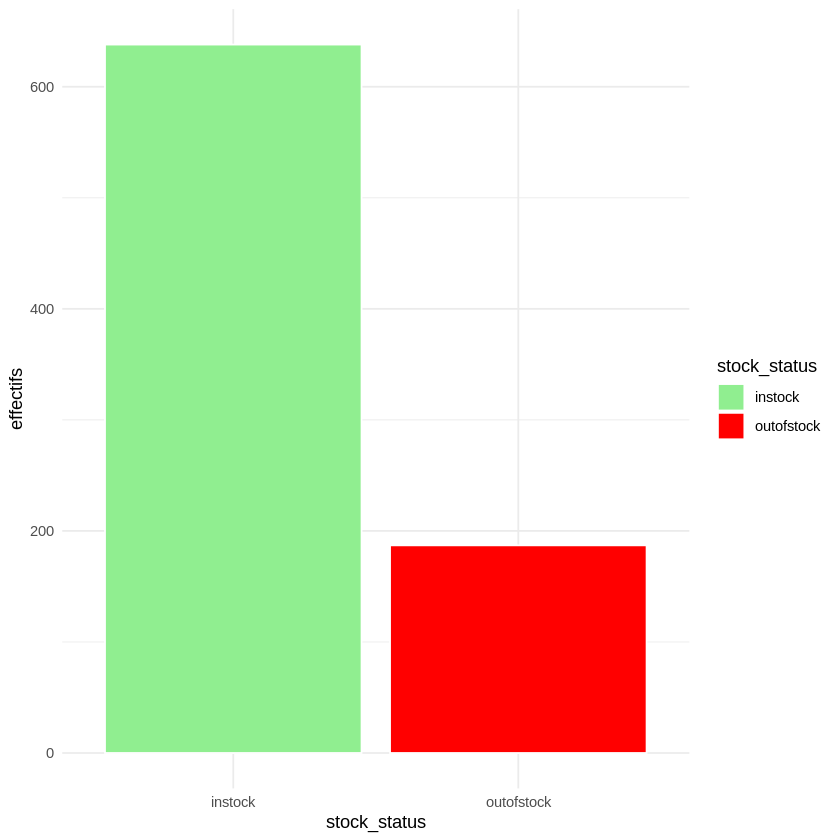

In [49]:
# VARIABLE QUALITATIVE
value_counts = as.data.frame(table(liaison_erp_web$stock_status))
colnames(value_counts) = c("stock_status","effectifs")

# Diagramme en tuyaux d'orgues
ggplot(value_counts, aes(x=stock_status, y=effectifs, fill=stock_status))+
geom_bar(stat="identity", color="white")+
scale_fill_manual(values=c("lightgreen", "red"))+
  theme_minimal()

La distribution de la variable ***onsale_web***, ***liaison_erp_web*** et ***post_date***:

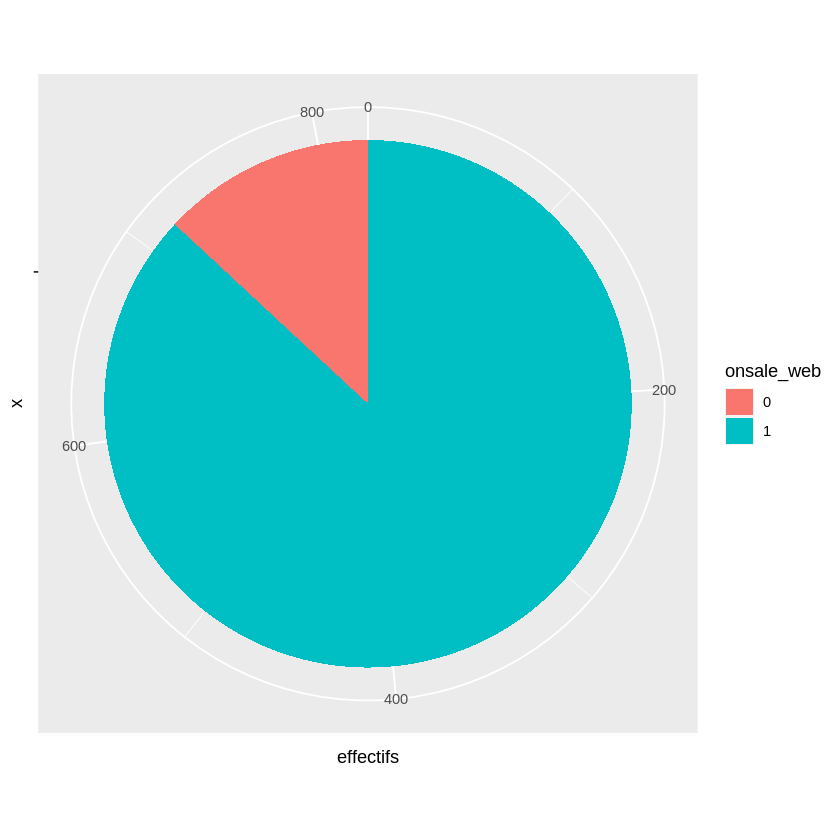

In [50]:
# VARIABLE QUALITATIVE
value_counts = as.data.frame(table(liaison_erp_web$onsale_web))
colnames(value_counts) = c("onsale_web","effectifs")

# Diagramme en secteurs
ggplot(value_counts, aes("",effectifs,fill=onsale_web)) +
    geom_bar(width = 1, stat = "identity") +
    coord_polar("y")

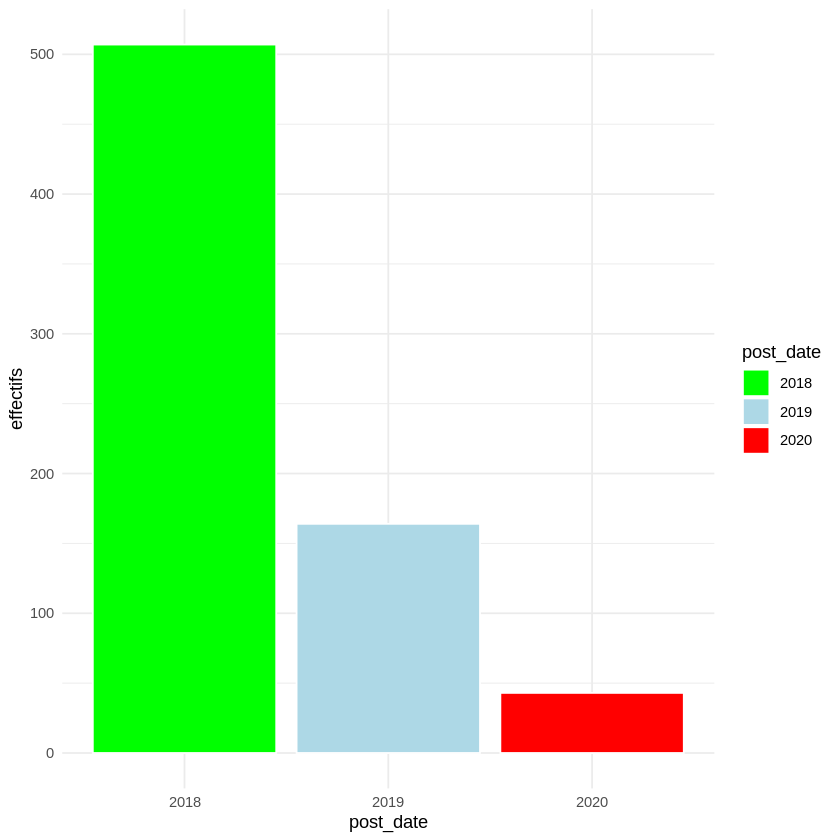

In [51]:
# VARIABLE QUALITATIVE
value_counts = as.data.frame(table(sans_NA_liaison_erp_web$post_date))
colnames(value_counts) = c("post_date","effectifs")

# Diagramme en tuyaux d'orgues
ggplot(value_counts, aes(x=post_date, y=effectifs, fill=post_date))+
geom_bar(stat="identity", color="white")+
scale_fill_manual(values=c("green", "lightblue", "red"))+
  theme_minimal()

#### Analysez la corrélation entre deux variables

*Analysez deux variables : stock_status(quantitative) & stock_quantity(qualitative)*

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“Removed 70 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 70 rows containing non-finite values (stat_summary).”


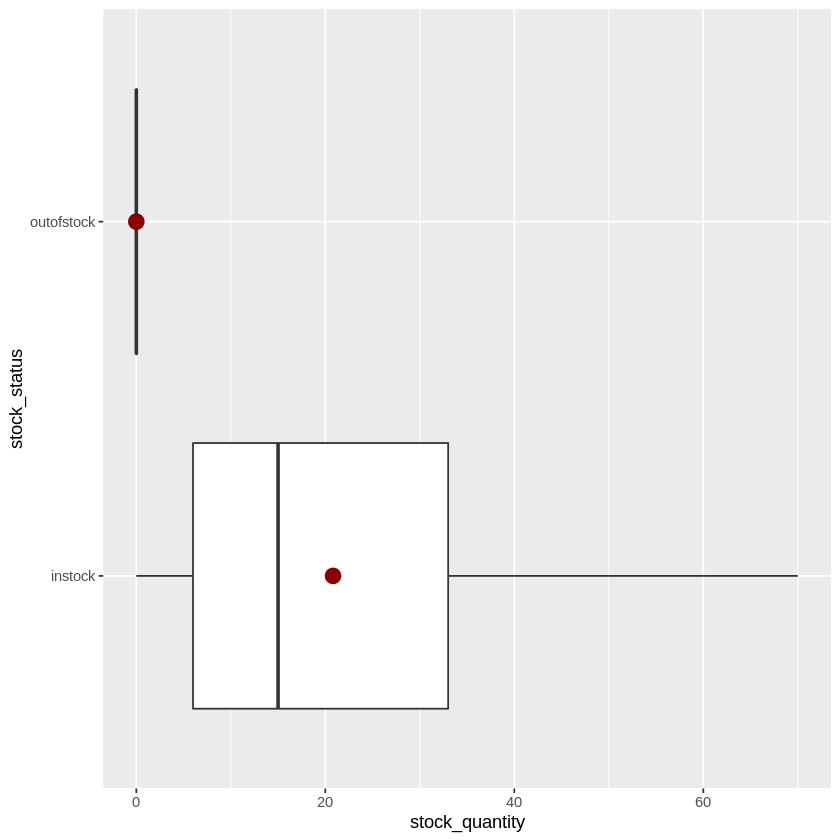

In [52]:
#X = "stock_status" # qualitative
#Y = "stock_quantity" # quantitative

ggplot(liaison_erp_web, aes(x=stock_status, y=stock_quantity)) + 
    geom_boxplot(outlier.shape = NA) + coord_flip() + 
    stat_summary(fun.y=mean, colour="darkred", geom="point", shape=19, size=4) +
    scale_y_continuous(limits = c(0,70))

*Analysez deux variables quantitatives : onsale_web & stock_quantity*

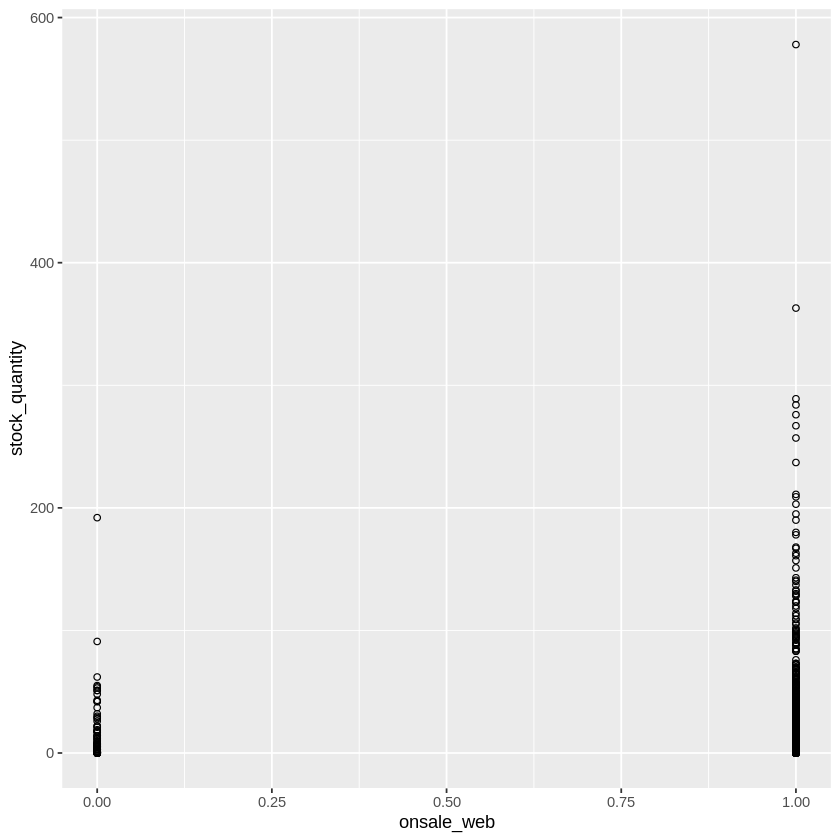

In [53]:
ggplot(liaison_erp_web, aes(onsale_web,stock_quantity)) + geom_point(shape=1) + 
    labs(x="onsale_web", y="stock_quantity")

<a id="sec:3"></a>

---
## Troisièmement, Extraire les outliers dans les prix
---

<a id="sec:visuelles"></a>

---
### 1. La méthode des visuelles
---

Les approches visuelles telles que l'histogramme, le nuage de points (comme le graphique Q-Q) et la boîte à moustaches sont la méthode la plus simple pour détecter les valeurs aberrantes: on va commencer par l'histogramme :

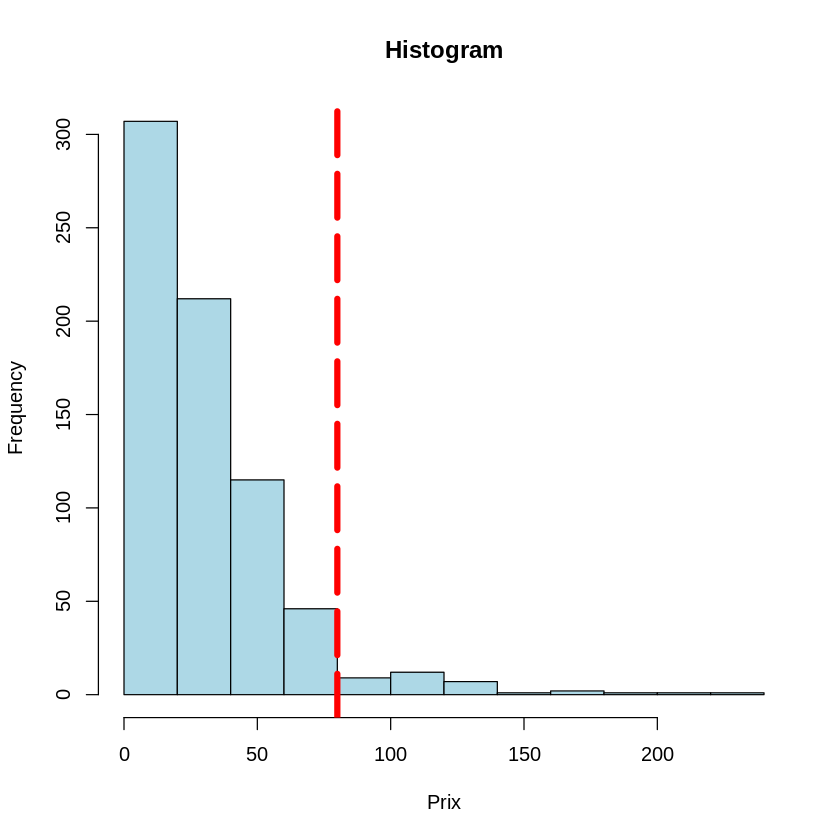

In [54]:
h = hist(sans_NA_liaison_erp_web$price, main="Histogram", col="lightblue", xlab="Prix")
abline(v = 80, col="red", lwd=5, lty=5)

Selon l'histogramme nous considérons plus de 80€ comme des valeurs aberrantes. En modifiant les valeurs des pauses, on peux obtenir un histogramme plus informatif:

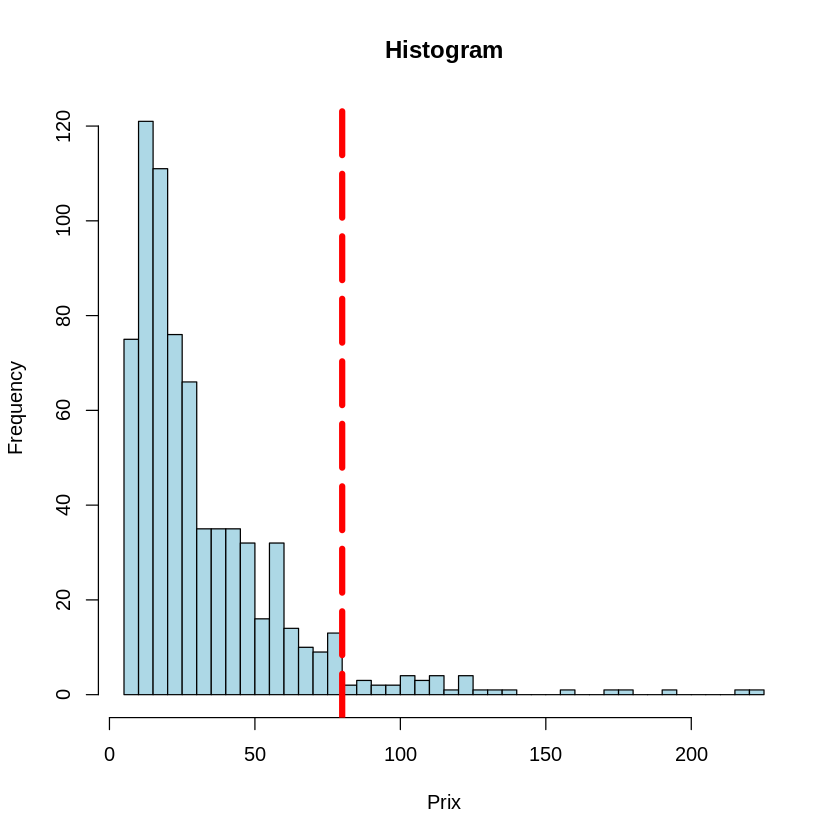

In [55]:
n_breaks <- 2*sqrt(nrow(sans_NA_liaison_erp_web))
h = hist(sans_NA_liaison_erp_web$price, main="Histogram", col="lightblue", xlab="Prix",breaks = n_breaks)
#abline(v=80, col="red")
abline(v = 80, col="red", lwd=5, lty=5)

Même après cela, nous pouvons encore voir le même résultat précédent. Ensuite, nous utiliserons deux figures nuage de points et une boîte à moustaches, pour voir ce qui se passe.

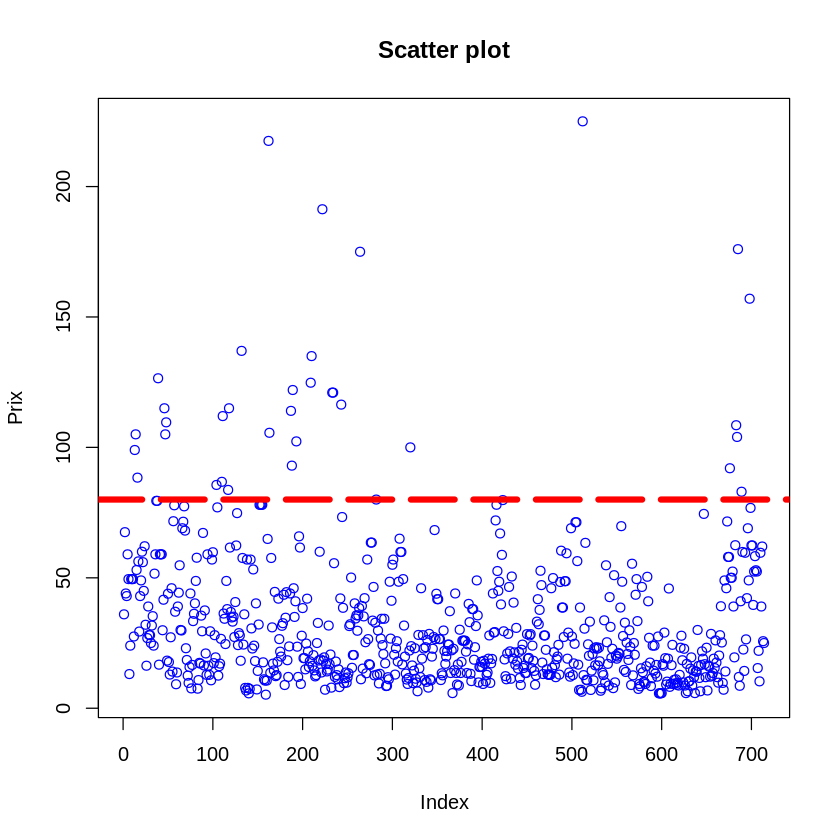

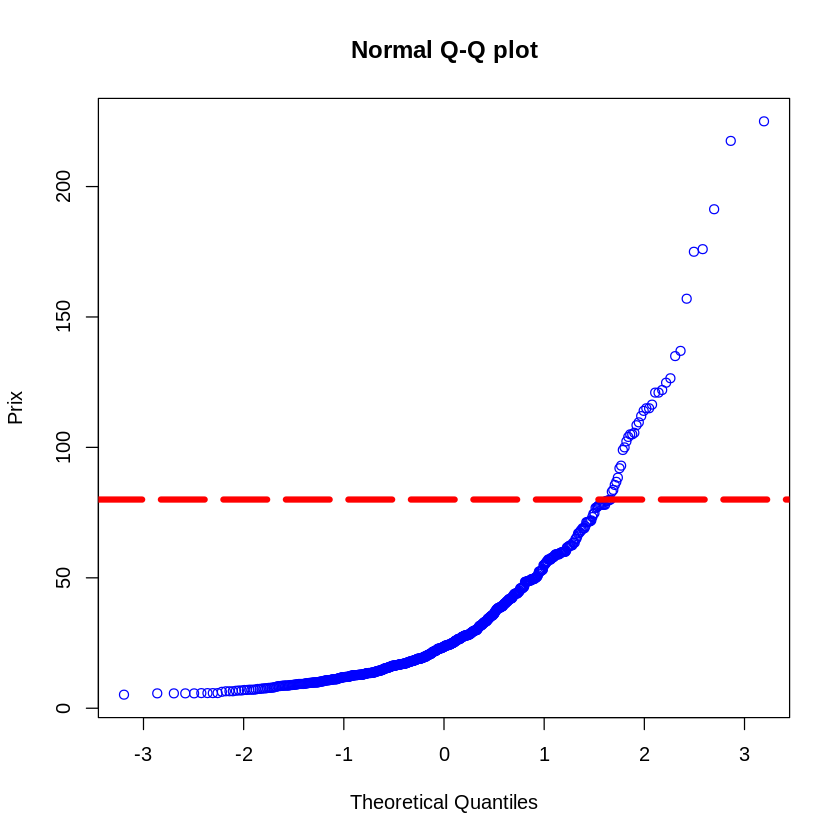

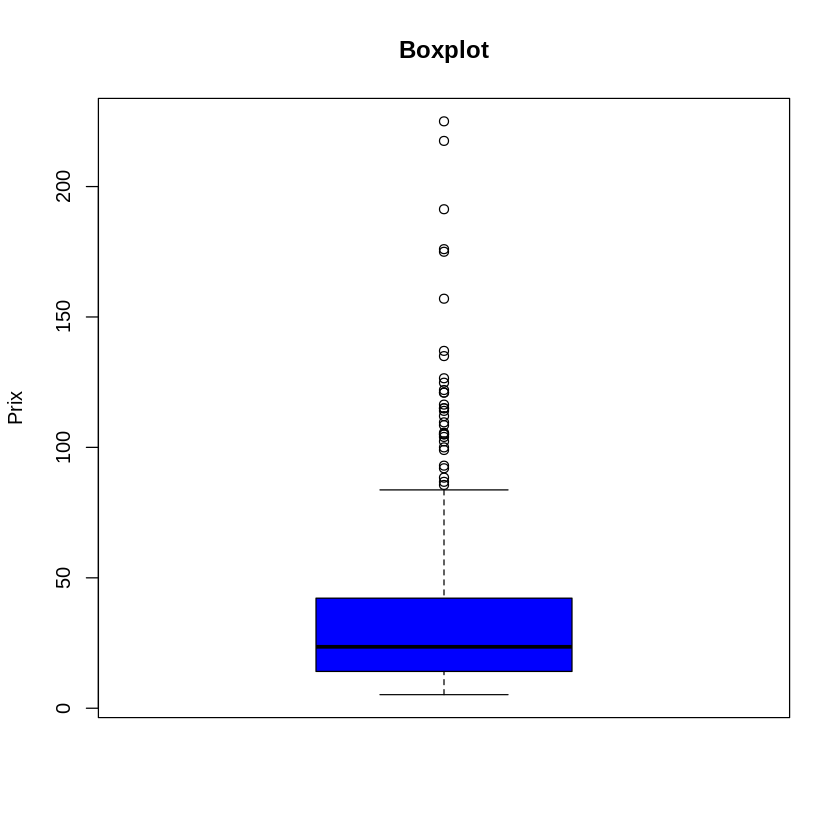

In [56]:
plot(sans_NA_liaison_erp_web$price, col="blue", ylab="Prix", main="Scatter plot")
#abline(h=80, col="red")
abline(h = 80, col="red", lwd=5, lty=5)
qqnorm(sans_NA_liaison_erp_web$price,col="blue", ylab="Prix", main = "Normal Q-Q plot")
abline(h = 80, col="red", lwd=5, lty=5)
boxplot(sans_NA_liaison_erp_web$price,col="blue",ylab="Prix", main = "Boxplot")
#boxplot(sans_NA_liaison_erp_web$price, main = "Boxplot horizontal", horizontal = TRUE)

On pourrait considérer que les valeurs vers plus de 80€ comme des valeurs outliers mais dans ces figures, nous constatons qu'on ne peut pas choisir des valeurs précise pour détecter comme des valeurs aberrantes. pour bien préciser et à fin de choisir les valeurs exactes, on va utiliser des autres méthodes :

<a id="sec:quantile"></a>

---
### 2. La méthode du quantile
---

Avec la méthode du quantile, on peut changer la limite inférieure et supérieure, dans notre rapport on va choisi deux limites supérieure 95% et 99% : 

- **Quantile 95%**

In [57]:
sans_NA_liaison_erp_web <- sans_NA_liaison_erp_web[,c("post_title","price","Chiffre_affaire","Per_chiffre_affaire","total_sales","stock_quantity","stock_status","post_date")]

lower_bound_95 <- quantile(sans_NA_liaison_erp_web$price, 0.05) #ici je supprimais ces valeurs, c'est un bon idea à votre avis?
upper_bound_95 <- quantile(sans_NA_liaison_erp_web$price, 0.95)
biggest_ind_95 <- which(sans_NA_liaison_erp_web$price < lower_bound_95 | sans_NA_liaison_erp_web$price > upper_bound_95)
quantile_95 <- sans_NA_liaison_erp_web[biggest_ind_95,]
down_quantile_95 <- quantile_95[order(quantile_95$price),]
dim(down_quantile_95)
head(down_quantile_95)

[1] 71  8

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
165,Moulin de Gassac IGP Pays d'Hérault Guilhem Blanc 2017,5.2,0.0,0.00000000,0,30,instock,2019
143,Maurel Pays d'Oc Cabernet-Sauvignon 2017,5.7,0.0,0.00000000,0,132,instock,2019
617,Maurel Cabardès Tradition 2017,5.7,34.2,0.04846348,6,94,instock,2018
618,Maurel Pays d'Oc Chardonnay 2019,5.7,245.1,0.34732161,43,167,instock,2018
619,Maurel Pays d'Oc Chenin-Colombard 2019,5.7,74.1,0.10500421,13,100,instock,2018
383,Maurel Pays d'Oc Merlot 2018,5.8,139.2,0.19725487,24,36,instock,2019


- **Quantile 99%**

In [58]:
lower_bound_99 <- quantile(sans_NA_liaison_erp_web$price, 0.01) # ici je supprimais ces valeurs, c'est un bon idea à votre avis ?
upper_bound_99 <- quantile(sans_NA_liaison_erp_web$price, 0.99)
biggest_ind_99 <- which(sans_NA_liaison_erp_web$price < lower_bound_99 | sans_NA_liaison_erp_web$price > upper_bound_99)
quantile_99 <- sans_NA_liaison_erp_web[biggest_ind_99, ]
dim(quantile_99)
down_quantile_99 <- quantile_99[order(quantile_99$price),]
dim(down_quantile_99)
head(down_quantile_99)

[1] 13  8

[1] 13  8

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
165,Moulin de Gassac IGP Pays d'Hérault Guilhem Blanc 2017,5.2,0.0,0.00000000,0,30,instock,2019
143,Maurel Pays d'Oc Cabernet-Sauvignon 2017,5.7,0.0,0.00000000,0,132,instock,2019
617,Maurel Cabardès Tradition 2017,5.7,34.2,0.04846348,6,94,instock,2018
618,Maurel Pays d'Oc Chardonnay 2019,5.7,245.1,0.34732161,43,167,instock,2018
619,Maurel Pays d'Oc Chenin-Colombard 2019,5.7,74.1,0.10500421,13,100,instock,2018
222,Champagne Gosset Célébris Vintage 2007,135.0,270.0,0.38260643,2,10,instock,2019


Nous notons que cette méthode n'est pas très utile dans  cette étude car elle contient une limite inférieure et une supérieure, et dans ce cas nous ne nous soucions que de déterminer la limite supérieure par contre la limite inférieure n'a aucune importance, nous appliquerons donc d'autres théories qui nous sont plus utiles et sont compatibles avec la première méthode des visuelles

<a id="sec:moyenne"></a>

---
### 3. La méthode de la moyenne et écart type
---

L'écart type et la moyenne des données peuvent être utilisés pour trouver les valeurs aberrantes dans l'ensemble de données.
Cette méthode fonctionne bien si les données sont distribuées normalement et lorsqu'il y a très peu de pourcentages de valeurs aberrantes dans l'ensemble de données. Il est également sensible aux valeurs aberrantes comme la moyenne et l'écart type changera si la valeur aberrante est présente.

In [59]:
#Mean and Standard deviation (SD) 
#get mean and Standard deviation
mean = mean(sans_NA_liaison_erp_web$price)
std = sd(sans_NA_liaison_erp_web$price)

# get threshold values for outliers
Tmin = mean-(3*std)
Tmax = mean+(3*std)

# find outlier
biggest_SD <- sans_NA_liaison_erp_web[which(sans_NA_liaison_erp_web$price < Tmin | sans_NA_liaison_erp_web$price > Tmax),]

Top_biggest_SD <- biggest_SD[order(biggest_SD$price, decreasing = TRUE),]
down_biggest_SD <- biggest_SD[order(biggest_SD$price),]

dim(down_biggest_SD)
head(down_biggest_SD)

[1] 14  8

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
256,Domaine Clerget Echezeaux Grand Cru En Orveaux 2015,116.4,0.0,0.00000,0,14,instock,2019
246,Domaine des Comtes Lafon Volnay 1er Cru Champans 2016,121.0,0.0,0.00000,0,6,instock,2019
247,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2016,121.0,0.0,0.00000,0,7,instock,2019
200,Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain,122.0,0.0,0.00000,0,4,instock,2019
221,Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2,124.8,0.0,0.00000,0,12,instock,2019
39,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,1391.5,1.97184,11,2,instock,2018


Cette méthode a identifié qu'il y a **14 valeurs** de 714 en total, comme des valeurs aberrantes, alors toutes les valeurs **plus que 116€** et cette valeur-là est beaucoup plus supérieure de la valeur vers 80€ selon les figures précédentes



On va voir avec autre méthode plus proch du résultat des figures :

<a id="sec:médiane"></a>

---
### 4. La méthode de la médiane et écart absolu médian
---

La médiane de l'ensemble de données peut être utilisée pour trouver la valeur aberrante. La médiane est plus robuste aux valeurs aberrantes que la moyenne. Contrairement à la moyenne, où l'écart type est utilisé pour la détection des valeurs aberrantes, la médiane est utilisée dans la méthode de l'écart médian absolu pour la détection des valeurs aberrantes.
Cette méthode est plus efficace que la méthode de la moyenne et de l'écart type pour la détection des valeurs aberrantes, mais cette méthode est également sensible si le jeu de données contient plus de 50 % de valeurs aberrantes ou si 50 % des données contiennent les mêmes valeurs.

In [60]:
#Median and Median Absolute Deviation (MAD)
# get median
med = median(sans_NA_liaison_erp_web$price)
# subtract median from each value of x and get absolute deviation
abs_dev = abs(sans_NA_liaison_erp_web$price-med)
# get MAD
mad = 1.4826 * median(abs_dev)

# get threshold values for outliers
Tmin = med-(3*mad) 
Tmax = med+(3*mad) 

# find outlier
biggest_MAD <- sans_NA_liaison_erp_web[which(sans_NA_liaison_erp_web$price < Tmin | sans_NA_liaison_erp_web$price > Tmax),]

Top_biggest_MAD <- biggest_MAD[order(biggest_MAD$price, decreasing = TRUE),]
down_biggest_MAD <- biggest_MAD[order(biggest_MAD$price),]

dim(down_biggest_MAD)
head(down_biggest_MAD)

[1] 49  8

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
667,Domaine de Vaccelli AOP Ajaccio Rouge Granit 174 2017,74.5,0,0,0,6,instock,2019
130,Stéphane Tissot Château-Chalon 2011,74.8,0,0,0,15,instock,2019
719,Marcel Windholtz Eau de Vie de Baie de Houx,76.8,0,0,0,3,instock,2018
108,Champagne Larmandier-Bernier Grand Cru Vieilles Vignes du Levant 2008,77.0,0,0,0,0,outofstock,2018
69,Zind-Humbrecht Gewurztraminer Grand Cru Rangen De Thann Clos Saint-Urbain 2013,77.4,0,0,0,7,instock,2018
58,Château de Vaudieu Châteauneuf-du-Pape L'Avenue 2015,77.8,0,0,0,11,instock,2018


Cette méthode a identifié qu'il y a **49 valeurs** de 714 en total comme des valeurs aberrantes, alors toutes les valeurs **plus que 74€** cette valeur-là est  plus inférieure de la valeur vers 80€ selon les figures précédentes, On préfère d'essayer d'autre méthode aussi afin d'arriver à résultat plus logique et identique avec des résultats des figures :

<a id="sec:interquartiles"></a>

---
### 5. La méthode des interquartiles
---
L'intervalle interquartile (IQR) est une différence entre les points de données qui se classent au 25e centile (premier quartile ou Q1) et au 75e centile (troisième quartile ou Q3) dans l'ensemble de données (IQR = Q3 - Q1). Les points de données qui sont à 1,5 IQR de Q1 et Q3 sont considérés comme des valeurs aberrantes.
Cette méthode est utile lorsque les données ne suivent pas une distribution normale.

In [61]:
#IQR(sans_NA_liaison_erp_web$price) #28.075
#summary(sans_NA_liaison_erp_web$price)
#Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
#   5.20   14.10  23.55   32.49   42.17  225.00
#Tmin = Q1-(1.5*IQR)
Tmin = 14.10-(1.5*28.075)#-28.0125
#Tmax = Q3-(1.5*IQR)
Tmax = 42.17+(1.5*28.075)#84.2825

# find outlier
biggest_IQR <- sans_NA_liaison_erp_web[which(sans_NA_liaison_erp_web$price < Tmin | sans_NA_liaison_erp_web$price > Tmax),]

Top_biggest_IQR <- biggest_IQR[order(biggest_IQR$price, decreasing = TRUE),]
down_biggest_IQR <- biggest_IQR[order(biggest_IQR$price),]

dim(down_biggest_IQR)
head(down_biggest_IQR)

[1] 32  8

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
107,Champagne Larmandier-Bernier Grand Cru Les Chemins d'Avize 2011,85.6,85.6,0.1213004,1,0,outofstock,2018
113,Champagne Agrapart &amp; Fils Minéral Extra Brut Blanc de Blancs Grand Cru 2012,86.8,0.0,0.0000000,0,2,instock,2018
16,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,88.4,0.0,0.0000000,0,5,instock,2018
696,Tempier Bandol Cabassaou 2017,92.0,0.0,0.0000000,0,0,outofstock,2018
199,Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde,93.0,0.0,0.0000000,0,3,instock,2019
13,Domaine des Comtes Lafon Volnay 1er Cru Champans 2013,99.0,0.0,0.0000000,0,7,instock,2019


Cette méthode a identifié qu'il y a **32 valeurs** de 714 en total comme des valeurs aberrantes, alors toutes les valeurs **plus que 85€**, on a trouvé que cette valeur est logique et la même de du résultat des figures. 

On va appliquer en suivante une méthode est très utile et efficace :

<a id="sec:Z"></a>

---
### 6. La méthode du z score
---

Si nos données proviennent d'une distribution normale, nous pouvons utiliser les scores z :

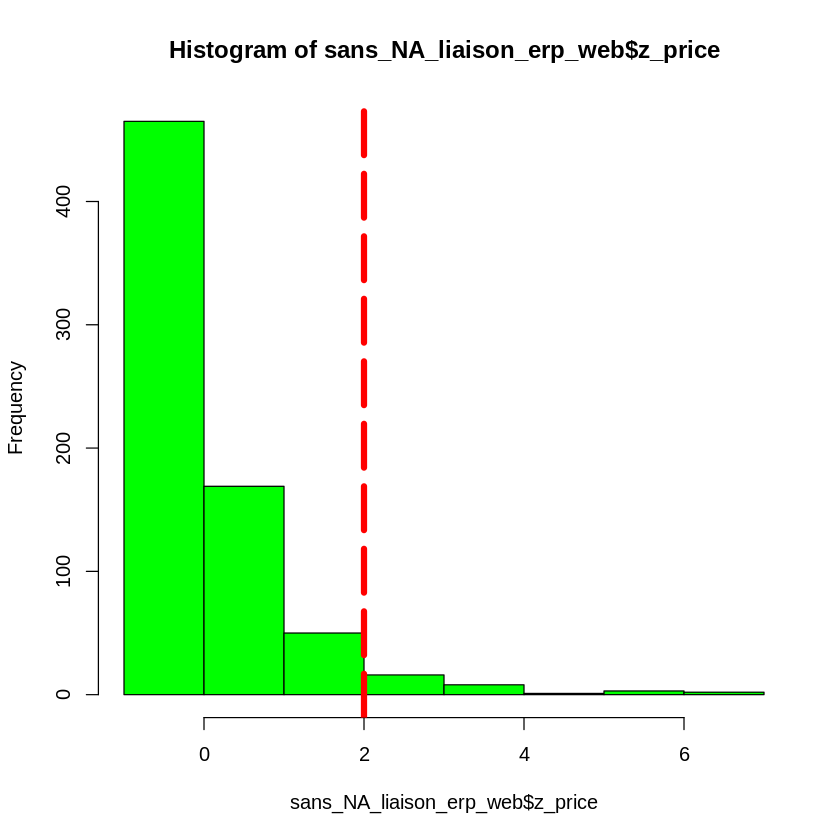

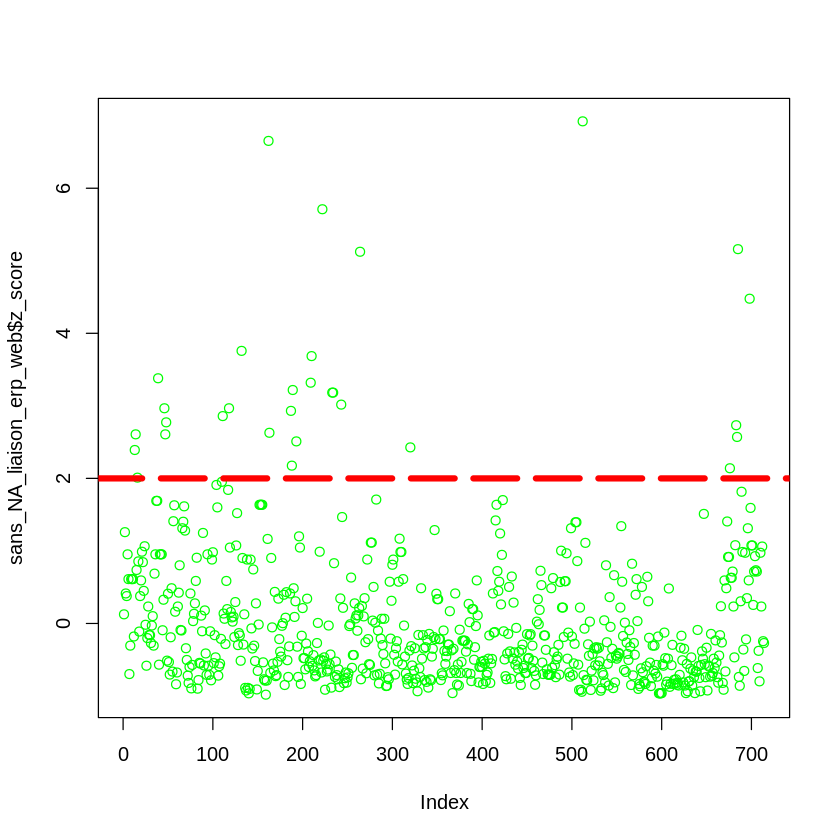

In [62]:
sans_NA_liaison_erp_web$z_price <- scale(sans_NA_liaison_erp_web$price)
hist(sans_NA_liaison_erp_web$z_price, col="green")
abline(v = 2, col="red", lwd=5, lty=5)
# calculate z-score
sans_NA_liaison_erp_web <- sans_NA_liaison_erp_web %>% mutate(z_score = (sans_NA_liaison_erp_web$price - mean(sans_NA_liaison_erp_web$price))/sd(sans_NA_liaison_erp_web$price))

#head(liaison_erp_web)

# plot z-score
plot(sans_NA_liaison_erp_web$z_score, col="green") 
abline(h = 2, col="red", lwd=5, lty=5)

Selon cette méthode et les deux figures précédentes, on va considérer que les valeurs de **z score plus de 2** comme des valeurs **aberrantes**.

In [63]:
biggest_Z <- sans_NA_liaison_erp_web[which(sans_NA_liaison_erp_web$z_price > 2),]

Top_biggest_Z <- biggest_Z[order(biggest_Z$price, decreasing = TRUE),]
down_biggest_Z <- biggest_Z[order(biggest_Z$price),]

dim(down_biggest_Z)
down_biggest_Z

[1] 30 10

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date,z_price,z_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,"<dbl[,1]>",<dbl>
16,Zind-Humbrecht Pinot Gris Grand Cru Rangen De Thann Clos Saint-Urbain 2012,88.4,0.0,0.0000000,0,5,instock,2018,2.010277,2.010277
696,Tempier Bandol Cabassaou 2017,92.0,0.0,0.0000000,0,0,outofstock,2018,2.139725,2.139725
199,Wemyss Malts Single Cask Scotch Whisky Chocolate Moka Cake 2005 Strathclyde,93.0,0.0,0.0000000,0,3,instock,2019,2.175682,2.175682
13,Domaine des Comtes Lafon Volnay 1er Cru Champans 2013,99.0,0.0,0.0000000,0,7,instock,2019,2.391428,2.391428
335,Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,100.0,0.0,0.0000000,0,11,instock,2018,2.427385,2.427385
205,Domaine Des Croix Corton Grand Cru Les Grèves 2017,102.3,0.0,0.0000000,0,20,instock,2018,2.510088,2.510088
704,Cognac Frapin Cigar Blend,104.0,104.0,0.1473743,1,6,instock,2018,2.571216,2.571216
14,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2013,105.0,0.0,0.0000000,0,10,instock,2018,2.607173,2.607173
48,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2014,105.0,0.0,0.0000000,0,17,instock,2018,2.607173,2.607173


Cette méthode a identifié qu'il y a **30 valeurs** de 714 en total comme des valeurs aberrantes, alors toutes les valeurs **plus que 88€**, comme La méthode des interquartiles, on a trouvé que cette valeur est logique. 

Alors on va choisi cette deux méthodes des **interquartiles** et **z-score** pour determiner les valeures outliers, nous avons remarqué que les valeurs de prix élevées ne signifient pas nécessairement des valeurs extrêmes, avec la preuve que le produit avec le prix le plus élevé ici **price=225€** à beaucoup de ventes**total_sales=5**, nous suggérons donc d'ajouter deux conditions pour voir s'il y a eu une erreur dans la saisie du prix :

1-**total_sales = 0** &

2-**stock_quantity > 0** : 

In [64]:
display_tables <- function(arg_df) { 
    df <- arg_df[order(arg_df$price, decreasing = TRUE),]
    View(df[df$stock_quantity > 0 & df$total_sales == 0, ])   
}  

In [65]:
display_tables(Top_biggest_IQR)

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
168,David Duband Charmes-Chambertin Grand Cru 2014,217.5,0,0,0,20,instock,2018
278,Camille Giroud Clos de Vougeot 2016,175.0,0,0,0,12,instock,2019
718,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age,157.0,0,0,0,3,instock,2018
221,Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2,124.8,0,0,0,12,instock,2019
200,Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain,122.0,0,0,0,4,instock,2019
246,Domaine des Comtes Lafon Volnay 1er Cru Champans 2016,121.0,0,0,0,6,instock,2019
247,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2016,121.0,0,0,0,7,instock,2019
256,Domaine Clerget Echezeaux Grand Cru En Orveaux 2015,116.4,0,0,0,14,instock,2019
47,Domaine des Comtes Lafon Volnay 1er Cru Champans 2014,115.0,0,0,0,4,instock,2019


In [66]:
display_tables(Top_biggest_Z)

,post_title,price,Chiffre_affaire,Per_chiffre_affaire,total_sales,stock_quantity,stock_status,post_date,z_price,z_score
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,"<dbl[,1]>",<dbl>
168,David Duband Charmes-Chambertin Grand Cru 2014,217.5,0,0,0,20,instock,2018,6.652405,6.652405
278,Camille Giroud Clos de Vougeot 2016,175.0,0,0,0,12,instock,2019,5.124206,5.124206
718,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age,157.0,0,0,0,3,instock,2018,4.476969,4.476969
221,Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2,124.8,0,0,0,12,instock,2019,3.319134,3.319134
200,Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain,122.0,0,0,0,4,instock,2019,3.218453,3.218453
246,Domaine des Comtes Lafon Volnay 1er Cru Champans 2016,121.0,0,0,0,6,instock,2019,3.182495,3.182495
247,Domaine des Comtes Lafon Volnay 1er Cru Santenots du Milieu 2016,121.0,0,0,0,7,instock,2019,3.182495,3.182495
256,Domaine Clerget Echezeaux Grand Cru En Orveaux 2015,116.4,0,0,0,14,instock,2019,3.017090,3.017090
47,Domaine des Comtes Lafon Volnay 1er Cru Champans 2014,115.0,0,0,0,4,instock,2019,2.966750,2.966750


Selon des recherches sur internet conforte l'hypothèse que même pour les bouteilles en stock qui n'ont pas été vendues les prix semblent corrects. Les figures ci-dessous présentent les premiers résultats de Google Shopping pour la requête : 
- ***"David Duband Charmes-Chambertin Grand Cru 2014" = 217.5€***

![image](david_2014.png)

- ***"Camille Giroud Clos de Vougeot 2016" = 176€***

![image](Camille_2016.JPG)

- ***"Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age" = 157€***

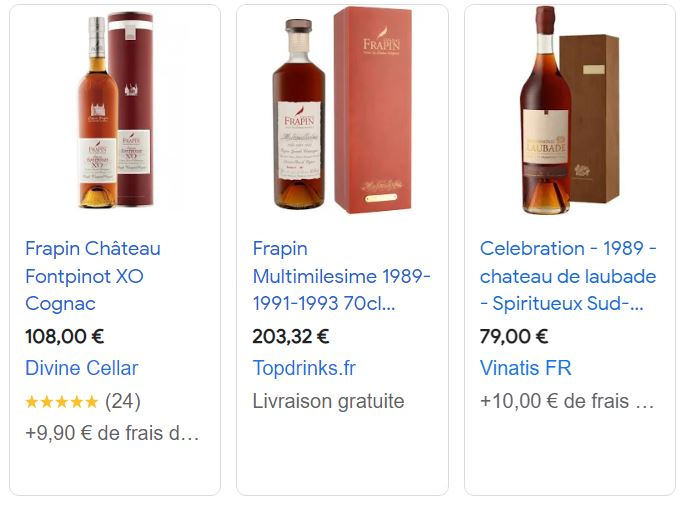![image](Frapin_1989.JPG)

<a id="sec:Con"></a>

---

## Conclusion et perspectives

---

Dans ce rapport: 

- Nous avons créé une base de données unifiée, claire, simple et propre.

- Nous avons calculé le chiffre d'affaires totales ainsi que le chiffre d'affaires et le percentage du chiffre d'affaires par produit. Nous avons également fait une liste des meilleurs produits en matière de chiffre d'affaires et une liste des meilleurs produits en matière de volume de ventes.

- Nous avons proposé et réalisé plusieurs figures graphiques pour connaître la distribution de plusieurs variables afin d'aider nos collègues des autres départements.

- L'attention doit être portée sur les produits les plus vendus. Par exemple, j'ai remarqué que le produit le plus vendu n'est pas disponible sur le site.

- Bien que je pense qu'il n'y a pas d'erreur dans la saisie des prix, j'ai remarqué que ces produits à prix élevés sont proposés à la vente sur le site depuis 2018 et 2019 sans être vendus.  Par conséquent, je recommande de faire des offres de vente ou de réduire leur prix.

- J'ai remarqué qu'il y a un pourcentage important de produits non proposés à la vente sur le site, cela doit être corrigé

- Le pourcentage de produits proposés à la vente sur le site Web diminue avec le temps, par exemple, le plus élevé en 2018 et le plus bas en 2020.

---

# Mohamad ALI